In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import random
from scipy import stats
import datetime as dt
from datetime import timedelta

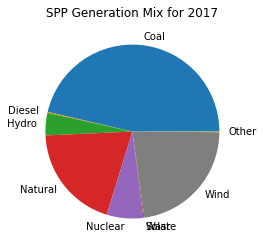

In [10]:
gen_mix = pd.read_csv(
    r'C:\Users\felip\Desktop\Electricity\Energy Market\Energy Market (SPP)\Generation Mix By Fuel Type\GenMix_2017.csv')

new = pd.DataFrame()

first = gen_mix.columns.values.tolist()[1].split(' ')[1]
new[first] = np.array([gen_mix[gen_mix.columns.values.tolist()[1]].sum()])
for element in gen_mix.columns.values.tolist()[2:]:
    if element.split(' ')[1] == first:
        new[first] = new[first] + np.array([gen_mix[element].sum()])
    else:
        new[element.split(' ')[1]] = np.array([gen_mix[element].sum()])
        first = element.split(' ')[1]

output = new.loc[0].values.tolist()[0:-1]
fuels = new.columns.values.tolist()[0:-1]

plt.pie(output,labels=fuels)
plt.title('SPP Generation Mix for 2017')
plt.show()

In [11]:
list_intervals = gen_mix[gen_mix.columns[0]].values.tolist()
clock = []
for time in list_intervals:
    hour_min = time.split('T')[1][:-1]
    clock.append(hour_min)
gen_mix['CLOCK'] = np.array(clock)

In [31]:
def GMT2CT(s):
    date = s.split('T')[0]
    date = dt.datetime.strptime(date,'%Y-%m-%d').date()
    time = s.split('T')[1][:-1]
    hour = int(time.split(':')[0])
    if hour >= 6:
        hour = hour - 6
    else:
        hour = 24 + (hour - 6)
        date = date - timedelta(1)
    time = str(hour) + ':' + time.split(':')[1] + ':' + time.split(':')[2]
    time = dt.datetime.strptime(time,'%H:%M:%S').time()
    return [date, time]
def calendar(s):
    date = s.split('T')[0]
    

In [32]:
local_time = []
local_date = []
for value in list_intervals:
    local_date.append(GMT2CT(value)[0])
    local_time.append(GMT2CT(value)[1])
gen_mix['Local Date'] = np.array(local_date)
gen_mix['Local Time'] = np.array(local_time)

In [33]:
gen_mix

,GMT MKT Interval,Coal Market,Coal Self,Diesel Fuel Oil,Hydro,Natural Gas,Nuclear,Solar,Waste Disposal Services,Wind,Waste Heat,Other,Average Actual Load,CLOCK,Local Date,Local Time
0,2017-01-01T06:00:00Z,2956.2,13385.3,0.0,251.8,3025.9,2098.4,0.0,7.7,4499.1,0.0,35.4,25380.548,06:00:00,2017-01-01,00:00:00
1,2017-01-01T06:05:00Z,2920.2,13342.3,0.0,241.7,2988.6,2100.8,0.0,8.1,4529.3,0.0,35.7,25356.102,06:05:00,2017-01-01,00:05:00
2,2017-01-01T06:10:00Z,2920.2,13254.2,0.0,241.7,2969.2,2100.8,0.0,8.1,4529.3,0.0,35.7,25356.102,06:10:00,2017-01-01,00:10:00
3,2017-01-01T06:15:00Z,2923.2,13380.3,0.0,267.6,2981.2,2099.1,0.0,8.1,4551.8,0.0,35.7,25358.945,06:15:00,2017-01-01,00:15:00
4,2017-01-01T06:20:00Z,2900.3,13388.1,0.0,276.7,2960.1,2099.8,0.0,8.7,4603.1,0.0,36.4,25345.252,06:20:00,2017-01-01,00:20:00
5,2017-01-01T06:25:00Z,2878.0,13387.8,0.0,276.7,2915.2,2099.1,0.0,9.4,4670.5,0.0,36.3,25332.792,06:25:00,2017-01-01,00:25:00
6,2017-01-01T06:30:00Z,2858.1,13294.4,0.0,276.9,2972.1,2098.9,0.0,10.2,4766.9,0.0,35.8,25271.662,06:30:00,2017-01-01,00:30:00
7,2017-01-01T06:35:00Z,2819.1,13243.0,0.0,276.7,2921.3,2098.9,0.0,10.0,4913.4,0.0,35.9,25246.368,06:35:00,2017-01-01,00:35:00
8,2017-01-01T06:40:00Z,2774.3,13129.6,0.0,277.3,2889.4,2101.3,0.0,10.4,5033.2,0.0,36.3,25261.166,06:40:00,2017-01-01,00:40:00
9,2017-01-01T06:45:00Z,2745.0,13125.3,0.0,278.5,2859.5,2097.5,0.0,10.9,5064.6,0.0,36.2,25272.178,06:45:00,2017-01-01,00:45:00
